In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7260\3938790504.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Step 1: Load and Explore the Dataset

In [3]:
titanic = sns.load_dataset('titanic')
print("First few rows of the Titanic dataset:")
titanic.head()

First few rows of the Titanic dataset:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Step 2: Descriptive Analytics

### 1. How would you generate a summary of the dataset to get basic statistical details for each numeric column, such as mean, median, and standard deviation?

In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 2. How would you visualize the distribution of the 'age' column using a histogram with a Kernel Density Estimate (KDE)?


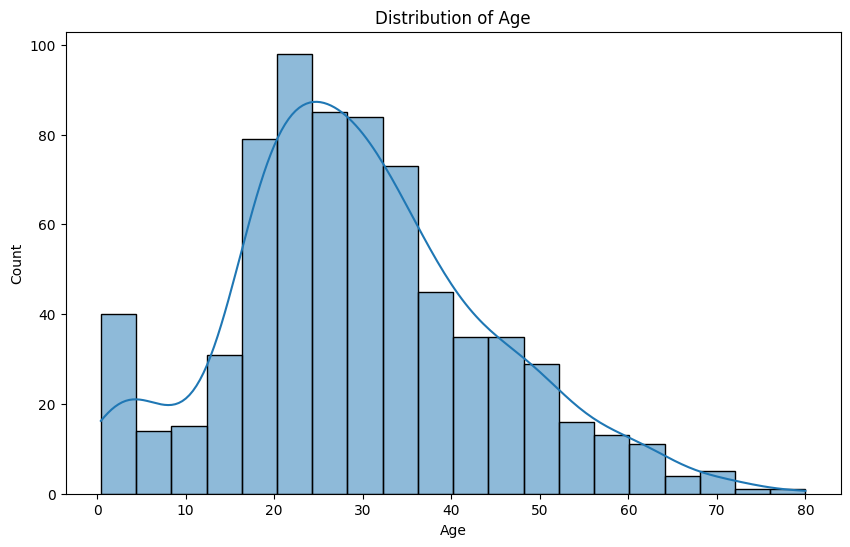

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='age', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 3. How would you create a bar plot to visualize the count of survivors categorized by passenger class?

In [44]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: xlabel='pclass', ylabel='survived'>

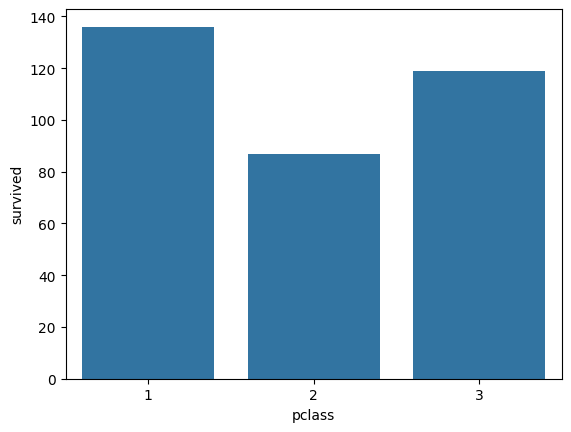

In [45]:
sns.barplot(x='pclass', y='survived',data=titanic.groupby('pclass').sum('survived'))

# Step 3: Diagnostic Analytics

### 1. How would you compute and display the correlation matrix for the Titanic dataset to identify relationships between numeric features?

In [41]:
corr_matrix = titanic.select_dtypes(include=[np.number]).corr()
corr_matrix

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## 2. How would you visualize the correlation matrix using a heatmap to highlight the strength of correlations?


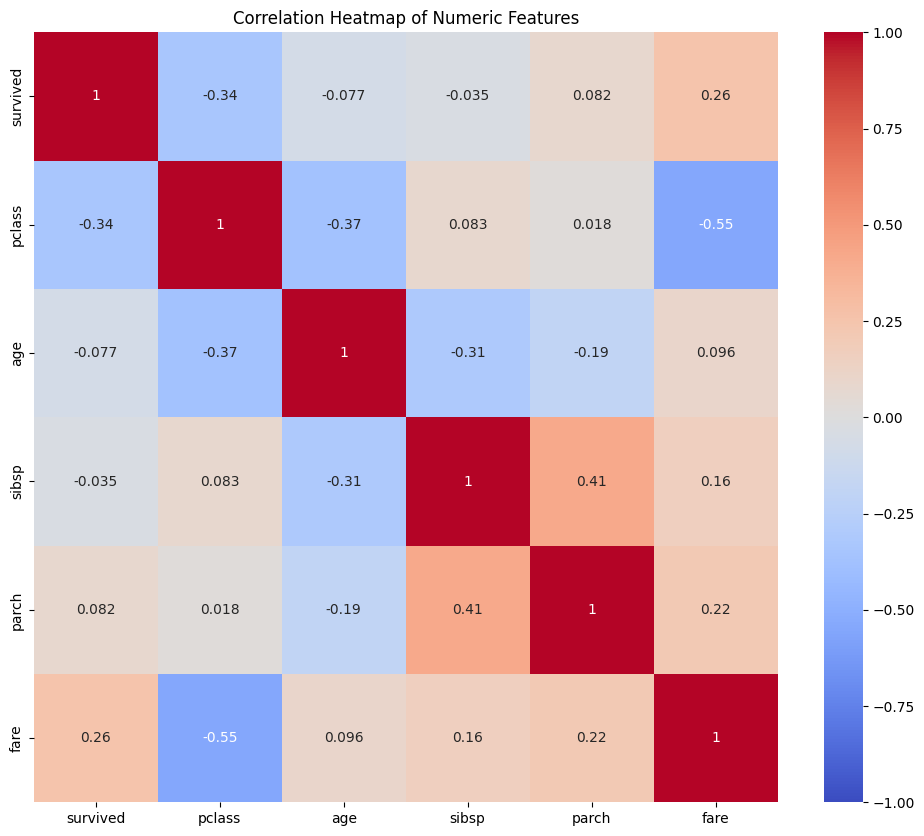

In [51]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Step 4: Predictive Analytics

## 1. How would you clean the Titanic dataset by removing rows with missing values for the columns 'age,' 'fare,' and 'embarked'?

In [52]:
titanic_clean = titanic.dropna(subset=['age', 'fare', 'embarked'], axis=0)
print(f"Original dataset shape: {titanic.shape}")
print(f"Cleaned dataset shape: {titanic_clean.shape}")

Original dataset shape: (891, 15)
Cleaned dataset shape: (712, 15)


## 2. How would you encode the categorical variables for predictive modeling, including converting the 'sex' column to numerical values and creating dummy variables for other categorical columns?

In [55]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [60]:
titanic.select_dtypes(['category','object']).columns

Index(['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive'], dtype='object')

In [63]:
titanic_encoded = titanic_clean.copy()
titanic_encoded = pd.get_dummies(titanic_encoded, columns=titanic_encoded.select_dtypes(['category','object']).columns, drop_first=True)
titanic_encoded.head()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_male,embarked_Q,...,who_woman,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,0,3,22.0,1,0,7.2500,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
1,1,1,38.0,1,0,71.2833,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,False,True,False,False,...,True,False,False,False,False,False,False,False,True,True
3,1,1,35.0,1,0,53.1000,False,False,False,False,...,True,False,True,False,False,False,False,False,True,True
4,0,3,35.0,0,0,8.0500,True,True,True,False,...,False,False,False,False,False,False,False,False,True,False


## 3. How would you define the features (X) and target (y) for a logistic regression model?

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone',
       'sex_male', 'embarked_Q', 'embarked_S', 'class_Second', 'class_Third',
       'who_man', 'who_woman', 'deck_B', 'deck_C', 'deck_D', 'deck_E',
       'deck_F', 'deck_G', 'embark_town_Queenstown', 'embark_town_Southampton',
       'alive_yes'],
      dtype='object')

In [66]:
features = titanic_encoded.drop('survived', axis=1).columns
X = titanic_encoded[features]
y = titanic_encoded['survived']

## 4. How would you split the dataset into training and testing sets with 20% of the data for testing?

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (569, 23)
Testing set shape: (143, 23)


## 5. How would you train a logistic regression model and evaluate its performance using accuracy, a confusion matrix, and a classification report?

In [69]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [70]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 1.00

Confusion Matrix:
[[80  0]
 [ 0 63]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        63

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



## 1. How would you create a simple rule-based recommendation that suggests increasing the fare if it is below the average fare, assuming that higher fares may correlate with better survival chances?


In [71]:
avg_fare = titanic_clean['fare'].mean()

def recommend_fare_increase(fare):
    if fare < avg_fare:
        return f"Increase fare to ${avg_fare:.2f} for better survival chances"
    else:
        return "No fare increase recommended"

titanic_clean['recommendation'] = titanic_clean['fare'].apply(recommend_fare_increase)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7260\2476186605.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_clean['recommendation'] = titanic_clean['fare'].apply(recommend_fare_increase)


## 2. How would you display the first few rows of the dataset to show the new recommendations?


In [72]:
print(titanic_clean[['fare', 'survived', 'recommendation']].head(10))

       fare  survived                                     recommendation
0    7.2500         0  Increase fare to $34.57 for better survival ch...
1   71.2833         1                       No fare increase recommended
2    7.9250         1  Increase fare to $34.57 for better survival ch...
3   53.1000         1                       No fare increase recommended
4    8.0500         0  Increase fare to $34.57 for better survival ch...
6   51.8625         0                       No fare increase recommended
7   21.0750         0  Increase fare to $34.57 for better survival ch...
8   11.1333         1  Increase fare to $34.57 for better survival ch...
9   30.0708         1  Increase fare to $34.57 for better survival ch...
10  16.7000         1  Increase fare to $34.57 for better survival ch...
